In [1]:
import numpy as np
import tskit, msprime
import COPYtest_extend_edges as ee
from IPython.display import SVG
import COPYevaluation as ev
from tqdm import tqdm
import plotly.graph_objects as go

In [2]:
def ext_edges(ts, max_iter):
    return ts.extend_edges(max_iter)

def ext_paths(ts, max_iter):
    return ee.extend_paths(ts, max_iter)

def total_extend(ts, max_iter, extend_first = True):
    last_num_edges = ts.num_edges
    if extend_first is True:
        extension = [ext_edges, ext_paths]
    if extend_first is False:
        extension = [ext_paths, ext_edges]
    # print(last_num_edges)
    for _ in range(max_iter):
        for e in extension:
            # print(e)
            ts = e(ts, max_iter)
            # print(ts.num_edges)
        if ts.num_edges == last_num_edges:
            break
        if ts.num_edges != last_num_edges:
            last_num_edges = ts.num_edges
            # print('swap')

    return ts

`sample_size = 100, population_size = 1000, sequence_length = 1e6, recombination_rate = 1e-8, random_seed = 16` runs an `assert_equals` error:

`AssertionError: EdgeTable row 723 differs:
self.left=257338.0 other.left=254978.0`

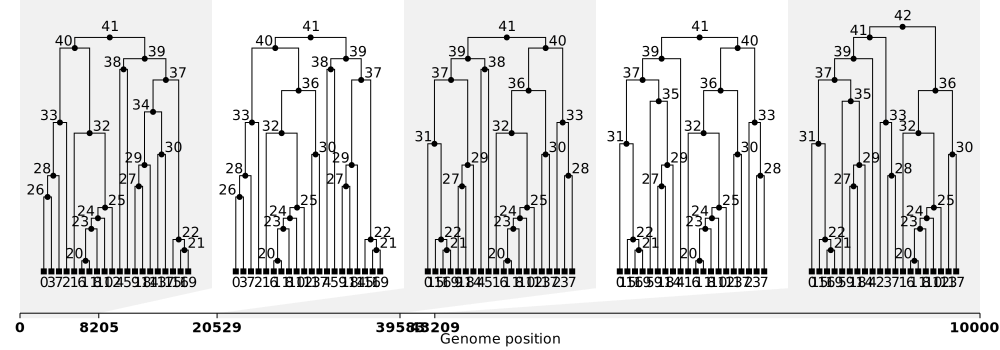

In [4]:
SVG(sts.draw_svg(time_scale='rank', size=(1000,350)))

In [ ]:
SVG(ets.draw_svg(time_scale='rank',size=(800,350)))

In [ ]:
for s in np.arange(5,101):
    if s > 0:
        print(s,'============================================')
        ts = msprime.sim_ancestry(10, population_size=100, sequence_length = 5e5, coalescing_segments_only=False, random_seed = s,
                                  recombination_rate=1e-8)
        sts = ts.simplify()
        ets = ext_paths(sts,10000)
        sts.tables.assert_equals(ets.simplify().tables, ignore_provenance=True)

In [3]:
for s in range(16,17):
    print(s,'====================')
    ts = msprime.sim_ancestry(100, population_size = 1000, sequence_length = 5e5, coalescing_segments_only = False, random_seed = s,
                                 recombination_rate = 1e-8)
    sts = ts.simplify()
    print(sts.num_nodes)
    # teee = total_extend(sts, 10000, True)
    teep = ext_paths(sts, 10000)
    print(sts.tables.edges[723])
    print(teep.simplify().tables.edges[723])
    sts.tables.assert_equals(teep.simplify().tables, ignore_provenance = True)

16 ====================
484
[438, 472, 478]
[427, 454, 478]
[427, 454, 478]
[427, 454, 478]
[306, 438, 453, 469]
104383.0 105537.0
child degree 306 3.0
new parent degree 438 0.0
old parent degree 469 3.0
extended
child with degree 306 3.0
old parent with degree 469 3.0
new parent with degree 438 0.0
[306, 438, 453, 469]
105537.0 118031.0
child degree 306 3.0
new parent degree 438 0.0
old parent degree 469 3.0
extended
child with degree 306 3.0
old parent with degree 469 3.0
new parent with degree 438 0.0
[306, 438, 453, 469]
118031.0 118584.0
child degree 306 3.0
new parent degree 438 0.0
old parent degree 469 3.0
extended
child with degree 306 3.0
old parent with degree 469 3.0
new parent with degree 438 0.0
[306, 438, 453, 469]
118584.0 126023.0
child degree 306 3.0
new parent degree 438 0.0
old parent degree 469 3.0
extended
child with degree 306 3.0
old parent with degree 469 3.0
new parent with degree 438 0.0
[306, 438, 453, 469]
126023.0 129666.0
child degree 306 3.0
new parent d

AssertionError: EdgeTable row 723 differs:
self.left=257338.0 other.left=254978.0

num_samples = 100, popsize = 1000, seq length = 5e5, coalescing_segments_only=False, recombination_rate = 1e-8

problem seeds = 16

#### Check Case
`random_seed = 19` and `total_extend(sts, 10000, extend_first = True`.
This function doesn't work however, `total_extend(sts, 10000, extend_first = False)` does compute properly.

In [ ]:
STS_edges = np.zeros(100)
EE_edges = np.zeros(100)
EP_edges = np.zeros(100)
TEEE_edges = np.zeros(100)
TEEP_edges = np.zeros(100)

In [12]:
length = 1e6
samples = 50
seeds = np.arange(20,101)
same_ts = np.full((100,), False, dtype = 'bool')
for s in tqdm(seeds):
    ts = msprime.sim_ancestry(samples, population_size = 1000, sequence_length = 1e6, coalescing_segments_only = False, random_seed = s,
                             recombination_rate = 1e-8)
    sts = ts.simplify()
    STS_edges[s-1] = sts.num_edges
    tsee = ext_edges(sts, 10000)
    tsep = ext_paths(sts, 10000)
    teee = total_extend(sts, 10000, True)
    teep = total_extend(sts, 10000, False)
    EE_edges[s-1] = tsee.num_edges
    EP_edges[s-1] = tsep.num_edges
    TEEE_edges[s-1] = teee.num_edges
    TEEP_edges[s-1] = teep.num_edges
    same_ts[s-1] = teee == teep

100%|███████████████████████████████████████████████████████████████████████████| 81/81 [1:55:32<00:00, 85.58s/it]


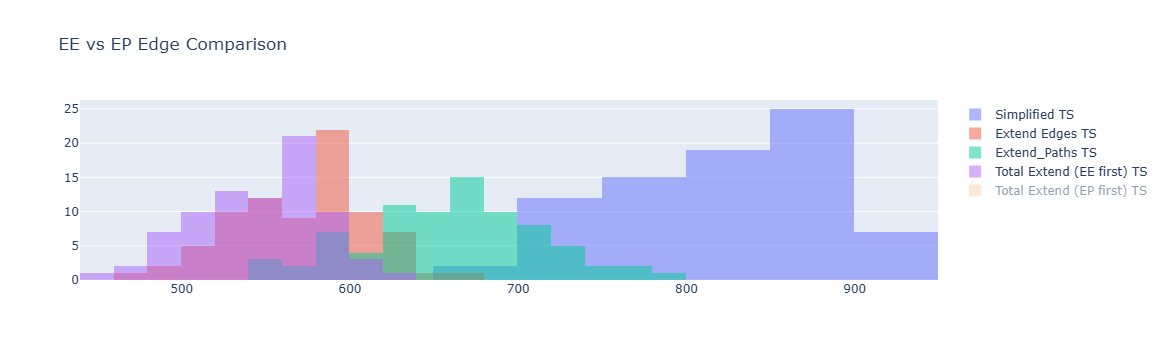

In [27]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = STS_edges[20:], name = 'Simplified TS'))
fig.add_trace(go.Histogram(x = EE_edges[20:], name = 'Extend Edges TS'))
fig.add_trace(go.Histogram(x = EP_edges[20:], name = 'Extend_Paths TS'))
fig.add_trace(go.Histogram(x = TEEE_edges[20:], name = 'Total Extend (EE first) TS'))
fig.add_trace(go.Histogram(x = TEEP_edges[20:], name = 'Total Extend (EP first) TS'))
fig.update_layout(title = 'EE vs EP Edge Comparison', barmode = 'overlay')
fig.update_traces(opacity = 0.5)
fig.show()

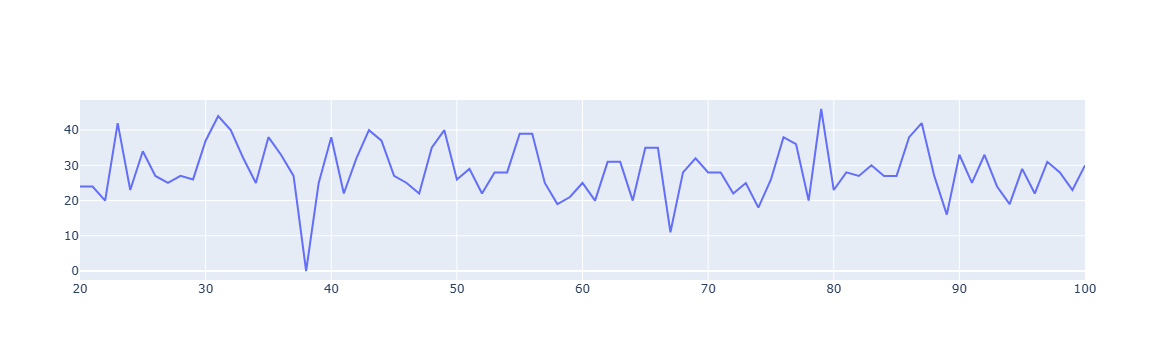

In [20]:
f = go.Figure()
f.add_trace(go.Scatter(x=seeds, y = EE_edges-TEEP_edges))
f.show()

In [19]:
np.count_nonzero(same_ts[20:]), same_ts[20:]
count = 0
for x in same_ts[20:]:
    if x:
        count+=1
count

50

## Graph some edge spans

In [18]:
s = np.random.randint(1,100)
print(s)
ts = msprime.sim_ancestry(50, population_size = 1000, sequence_length = 1e6, coalescing_segments_only = False,
                          random_seed = s, recombination_rate = 1e-8)
sts = ts.simplify()
eets = sts.extend_edges(1000)
epts = ee.extend_paths(sts, 11000)
tts = total_extend(sts, 10000, extend_first = False)
ttse = total_extend(sts, 10000, extend_first = True)
x = np.arange(1,ts.num_nodes+1)

1


In [19]:
ts_spans = ev.node_spans(ts)
tts_spans = ev.node_spans(tts)
sts_spans = ev.node_spans(sts)
eets_spans = ev.node_spans(eets)
epts_spans = ev.node_spans(epts)
ttse_spans = ev.node_spans(ttse)

In [20]:
sort_eets_spans = np.sort(eets_spans)
sort_epts_spans = np.sort(epts_spans)
sort_sts_spans = np.sort(sts_spans)
sort_ts_spans = np.sort(ts_spans)
sort_tts_spans = np.sort(tts_spans)
sort_ttse_spans = np.sort(ttse_spans)

In [23]:
tts == ttse

True

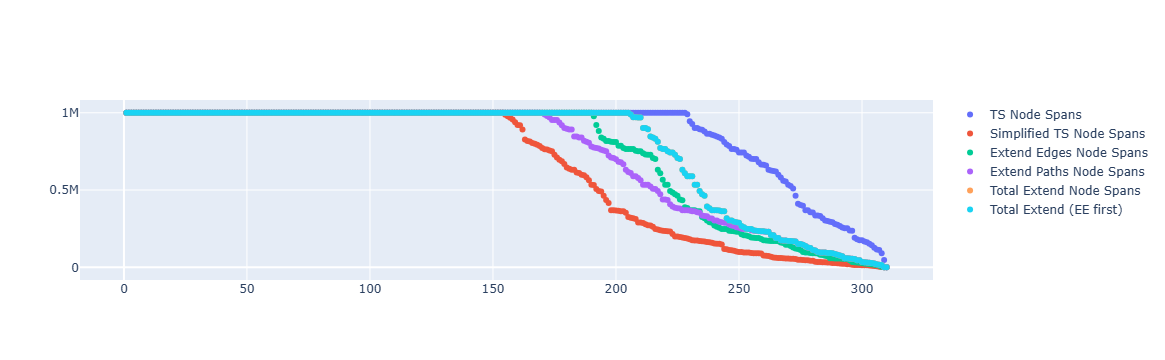

In [21]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x = x, y = sort_ts_spans[::-1], name = 'TS Node Spans', mode = 'markers'))
fig2.add_trace(go.Scatter(x = x, y = sort_sts_spans[::-1], name = 'Simplified TS Node Spans', mode = 'markers'))
fig2.add_trace(go.Scatter(x = x, y = sort_eets_spans[::-1], name = 'Extend Edges Node Spans', mode = 'markers'))
fig2.add_trace(go.Scatter(x = x, y = sort_epts_spans[::-1], name = 'Extend Paths Node Spans', mode = 'markers'))
fig2.add_trace(go.Scatter(x = x, y = sort_tts_spans[::-1], name = 'Total Extend Node Spans', mode = 'markers'))
fig2.add_trace(go.Scatter(x = x, y = sort_ttse_spans[::-1], name = 'Total Extend (EE first)', mode = 'markers'))
# fig2.update_layout(x_axes = dict('title' = 'Node'), y_axes = dict('title' = 'Node Span'))
fig2.show()

### Graph Time vs Node Span Curves as well.

In [18]:
ts_nt = ts.tables.nodes.time
sts_nt = sts.tables.nodes.time
eets_nt = eets.tables.nodes.time
epts_nt = epts.tables.nodes.time
tts_nt = tts.tables.nodes.time

In [54]:
ts_data =[[ts_spans[i], ts_nt[i]] for i in range(ts.num_nodes)]
sts_data = [[sts_spans[i], sts_nt[i]] for i in range(ts.num_nodes)]
eets_data = [[eets_spans[i], eets_nt[i]] for i in range(ts.num_nodes)]
epts_data = [[epts_spans[i], epts_nt[i]] for i in range(ts.num_nodes)]
tts_data = [[tts_spans[i], tts_nt[i]] for i in range(ts.num_nodes)]
for data in [ts_data, sts_data, eets_data, epts_data, tts_data]:
    data.sort(key = lambda x: x[1])
ts_data = np.asarray(ts_data)
sts_data = np.asarray(sts_data)
eets_data = np.asarray(eets_data)
epts_data = np.asarray(epts_data)
tts_data = np.asarray(tts_data)

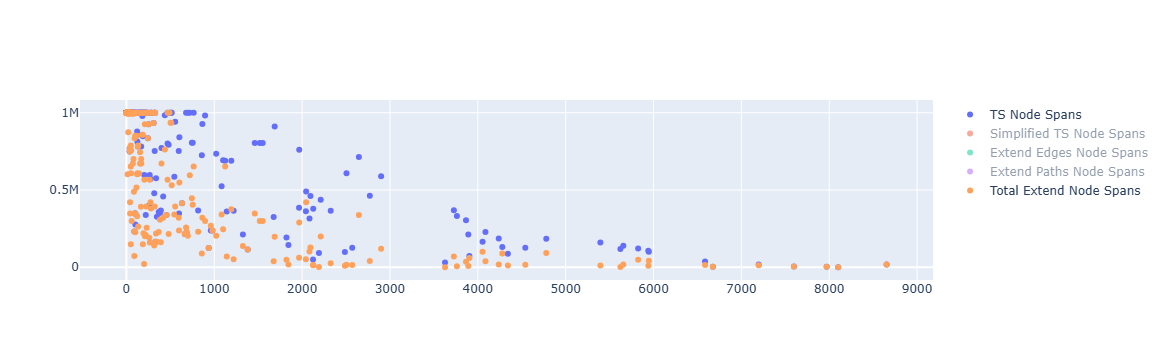

In [30]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x = ts_nt, y = ts_spans, name = 'TS Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = sts_nt, y = sts_spans, name = 'Simplified TS Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = eets_nt, y = eets_spans, name = 'Extend Edges Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = epts_nt, y = epts_spans, name = 'Extend Paths Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = tts_nt, y = tts_spans, name = 'Total Extend Node Spans', mode = 'markers'))
fig3.show()

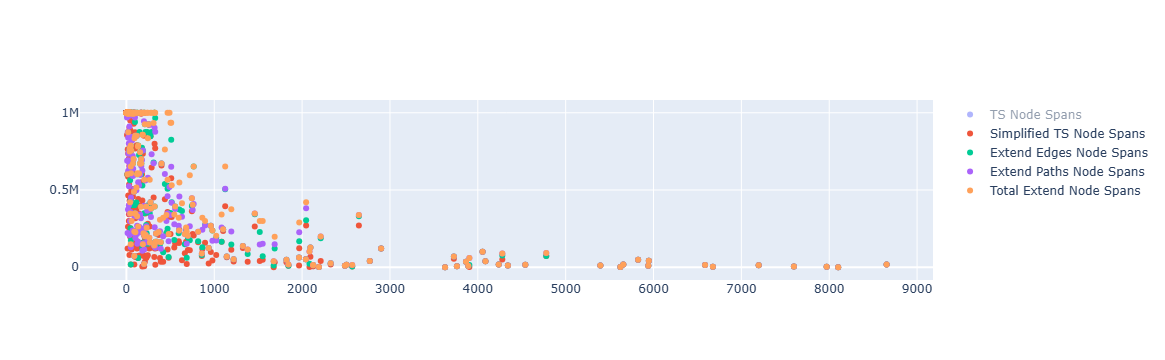

In [57]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x = ts_data[:,1], y = ts_data[:,0], name = 'TS Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = sts_data[:,1], y = sts_data[:,0], name = 'Simplified TS Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = eets_data[:,1], y = eets_data[:,0], name = 'Extend Edges Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = epts_data[:,1], y = epts_data[:,0], name = 'Extend Paths Node Spans', mode = 'markers'))
fig3.add_trace(go.Scatter(x = tts_data[:,1], y = tts_data[:,0], name = 'Total Extend Node Spans', mode = 'markers'))
fig3.show()

### Sequence Issue
Check `total_extend(extend_first = True)` for `random_seed = 19`.

#### Thoughts on the issue (5/20). (RESOLVED)
Currently, on iteration 1 (back pass on the second pass through) for extend paths there exists an edge `EdgeTableRow(left=550452.0, right=858392.0, parent=309, child=295, metadata=b'')`.
A second edge `EdgeTableRow(left=858392.0, right=919070.0, parent=301, child=295, metadata=b'')` on the pass gets extended to become edge:
`EdgeTableRow(left=852261.0, right=919070.0, parent=301, child=295, metadata=b'')`. We then assign `nodes_edge[295]` to be this edge.

Later... on the tree below we have the following output.

`812988.0 806857.0`

`path [273, 295, 309, 312]`

`old edge id 469` with `old edge EdgeTableRow(left=858392.0, right=919070.0, parent=301, child=295, metadata=b'')`

`old_parent 301` and `new_parent 309`

`295 309 NEW EDGE --> EdgeTableRow(left=806857.0, right=812988.0, parent=309, child=295, metadata=b'')`

I think has happened as once we have delared `nodes_edge[295]` as the one above, it did not reupdate in the next tree.

`----------- 828361.0 852261.0 ----------`.

as the original tree sequence has already recorded it as in this tree.
We may have to construct some machinery to record when this happens to readjust this `tree_pos` object.
This may also increase efficiency on the `extend_paths` function, as currently I am not sure if it is extending edges 
more than one tree at a time per pass of the algorithm.
ie. I believe that an edge can be extended $T_1 \to T_2$ during a single forward pass, but no further as the `tree_pos` is not updated 
for this extension.

In [3]:
ts = msprime.sim_ancestry(50, population_size = 1000, sequence_length = 1e6, coalescing_segments_only = False, random_seed = 19,
                             recombination_rate = 1e-8)
sts = ts.simplify()
teee = total_extend(sts, 10000, True)
# teep = total_extend(sts, 10000, False)

<function ext_edges at 0x7f2c5a27f310>
<function ext_paths at 0x7f2c5a27f3a0>
0
TREE SCAN IN RANGE 551641.0 557342.0
295 edge 468
295 parent 309
-----------------
TREE SCAN OUT RANGE 868181.0 873886.0
295 edge -1
295 parent 309
--------
TREE SCAN IN RANGE 868181.0 873886.0
295 edge 448
295 parent 301
-----------------
TREE SCAN OUT RANGE 919070.0 926446.0
295 edge -1
295 parent 301
--------
TREE SCAN IN RANGE 919070.0 926446.0
295 edge 615
295 parent 347
-----------------
TREE SCAN OUT RANGE 929060.0 930315.0
295 edge -1
295 parent 347
--------
TREE SCAN IN RANGE 929060.0 930315.0
295 edge 449
295 parent 301
-----------------
0
TREE SCAN IN RANGE 1000000.0 998360.0
295 edge 449
295 parent 301
-----------------
TREE SCAN OUT RANGE 929060.0 927350.0
295 edge -1
295 parent 301
--------
TREE SCAN IN RANGE 929060.0 927350.0
295 edge 615
295 parent 347
-----------------
TREE SCAN OUT RANGE 919070.0 902267.0
295 edge -1
295 parent 347
--------
TREE SCAN IN RANGE 919070.0 902267.0
295 edge 448

In [4]:
teee == sts

False

In [5]:
teee.num_edges, sts.num_edges

(592, 928)

In [7]:
sts.tables.assert_equals(teee.simplify().tables, ignore_provenance = True)